In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,TargetEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,average_precision_score 
sns.set_theme(rc={'figure.figsize':(2.5,1.5)})

In [5]:
df=pd.read_csv('train.csv')
df.head()

,ID,age,sex,myocardial_infarctions_anamnesis,Exertional_angina_pectoris_anamnesis,FC_of_angina_pectoris,Coronary_heart_disease(CHD),Heredity_on_CHD,essential_hypertension,Symptomatic_hypertension,...,supr_tach,ven_tach,ven_fib,th_d_av,pul_ede,myo_rup,dres_syn,ch_hf,re_myin,p_inf_ang
0,6543,69.000000,female,two,3y ago,II FC,unstable,NaN,Stage 2,0,...,0,0,0,0,0,0,0,0,0,0
1,6544,58.000000,male,zero,never,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6545,72.000000,female,zero,>5y ago,II FC,exertional,NaN,Stage 3,?,...,0,0,0,0,0,0,0,0,1,0
3,6546,73.000000,female,zero,?,IV FC,unstable,NaN,NaN,1,...,0,0,0,0,0,0,0,1,0,0
4,6547,75.655137,female,zero,3y ago,0,exertional,NaN,Stage 3,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Columns: 123 entries, ID to p_inf_ang
dtypes: float64(52), int64(13), object(58)
memory usage: 1.1+ MB


ID                                        0
age                                     250
sex                                     246
myocardial_infarctions_anamnesis          7
Exertional_angina_pectoris_anamnesis    160
                                       ... 
myo_rup                                   0
dres_syn                                  0
ch_hf                                     0
re_myin                                   0
p_inf_ang                                 0
Length: 123, dtype: int64

In [7]:
df.nunique()

ID                                      1190
age                                      246
sex                                        2
myocardial_infarctions_anamnesis           4
Exertional_angina_pectoris_anamnesis       8
                                        ... 
myo_rup                                    2
dres_syn                                   2
ch_hf                                      2
re_myin                                    2
p_inf_ang                                  2
Length: 123, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1190.0,7137.500000,343.667717,6543.0,6840.25,7137.5,7434.75,7732.000000
age,940.0,63.242062,11.410026,26.0,56.00,64.0,71.00,94.455567
nr11,933.0,0.098607,0.298293,0.0,0.00,0.0,0.00,1.000000
nr02,933.0,0.076099,0.265298,0.0,0.00,0.0,0.00,1.000000
nr07,1177.0,0.070518,0.256127,0.0,0.00,0.0,0.00,1.000000
...,...,...,...,...,...,...,...,...
myo_rup,1190.0,0.030252,0.171352,0.0,0.00,0.0,0.00,1.000000
dres_syn,1190.0,0.038655,0.192853,0.0,0.00,0.0,0.00,1.000000
ch_hf,1190.0,0.229412,0.420631,0.0,0.00,0.0,0.00,1.000000
re_myin,1190.0,0.090756,0.287383,0.0,0.00,0.0,0.00,1.000000


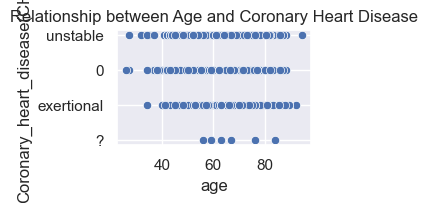

In [27]:
sns.scatterplot(data=df, x='age', y='Coronary_heart_disease(CHD)')
plt.title('Relationship between Age and Coronary Heart Disease')
plt.show()


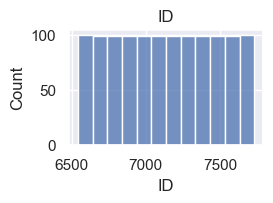

<Figure size 500x300 with 0 Axes>

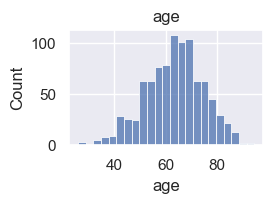

<Figure size 500x300 with 0 Axes>

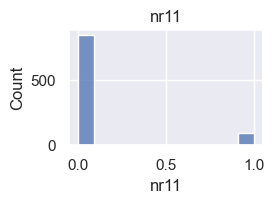

<Figure size 500x300 with 0 Axes>

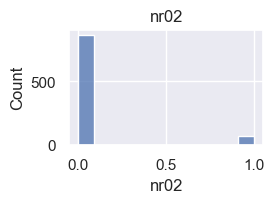

<Figure size 500x300 with 0 Axes>

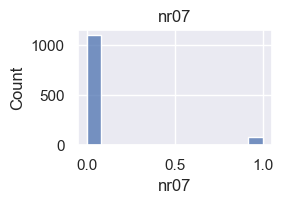

<Figure size 500x300 with 0 Axes>

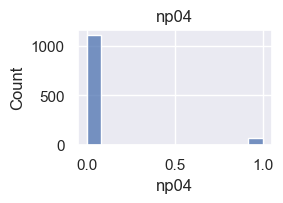

<Figure size 500x300 with 0 Axes>

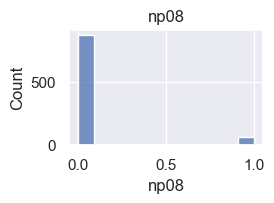

<Figure size 500x300 with 0 Axes>

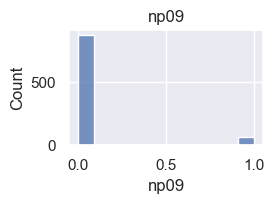

<Figure size 500x300 with 0 Axes>

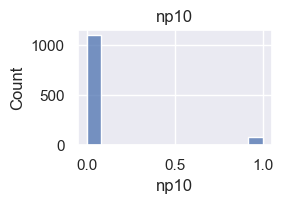

<Figure size 500x300 with 0 Axes>

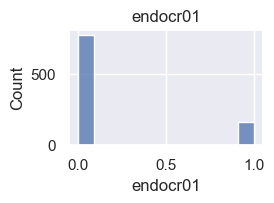

<Figure size 500x300 with 0 Axes>

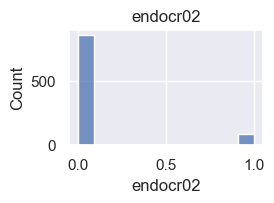

<Figure size 500x300 with 0 Axes>

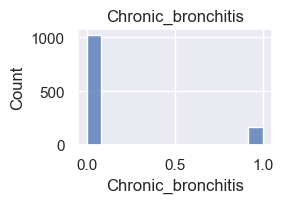

<Figure size 500x300 with 0 Axes>

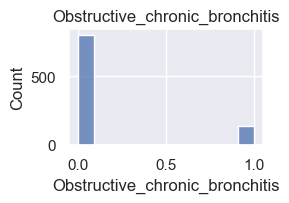

<Figure size 500x300 with 0 Axes>

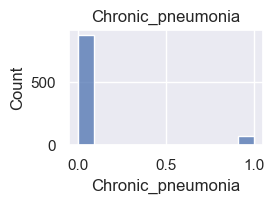

<Figure size 500x300 with 0 Axes>

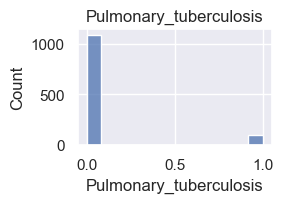

<Figure size 500x300 with 0 Axes>

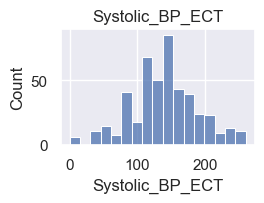

<Figure size 500x300 with 0 Axes>

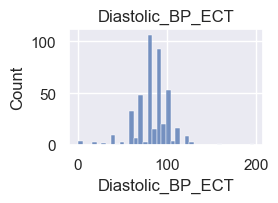

<Figure size 500x300 with 0 Axes>

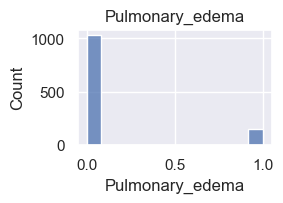

<Figure size 500x300 with 0 Axes>

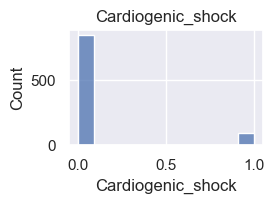

<Figure size 500x300 with 0 Axes>

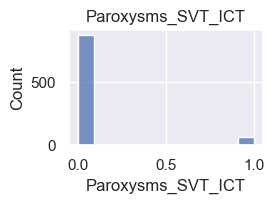

<Figure size 500x300 with 0 Axes>

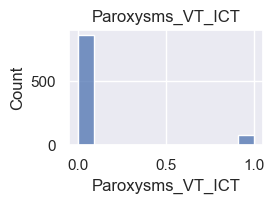

<Figure size 500x300 with 0 Axes>

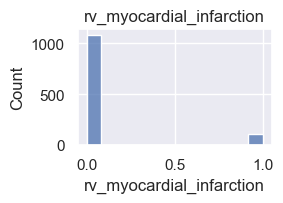

<Figure size 500x300 with 0 Axes>

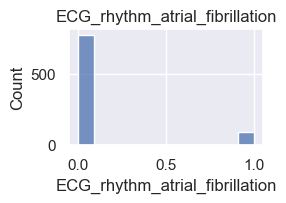

<Figure size 500x300 with 0 Axes>

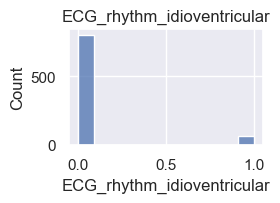

<Figure size 500x300 with 0 Axes>

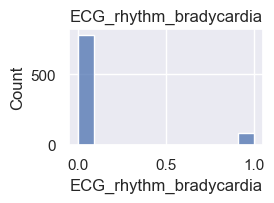

<Figure size 500x300 with 0 Axes>

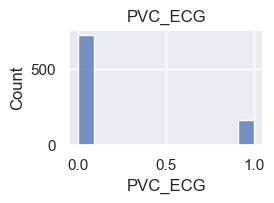

<Figure size 500x300 with 0 Axes>

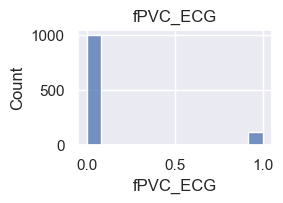

<Figure size 500x300 with 0 Axes>

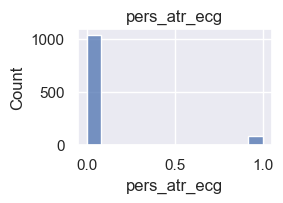

<Figure size 500x300 with 0 Axes>

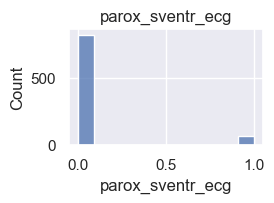

<Figure size 500x300 with 0 Axes>

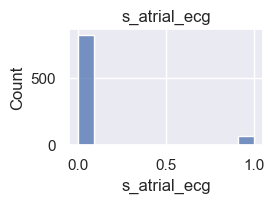

<Figure size 500x300 with 0 Axes>

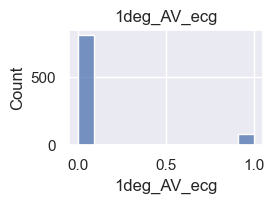

<Figure size 500x300 with 0 Axes>

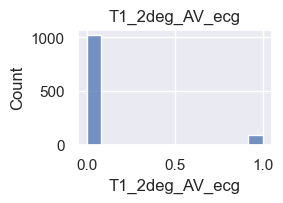

<Figure size 500x300 with 0 Axes>

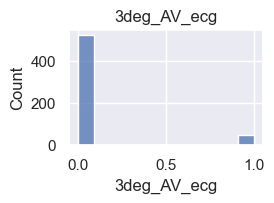

<Figure size 500x300 with 0 Axes>

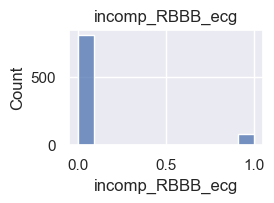

<Figure size 500x300 with 0 Axes>

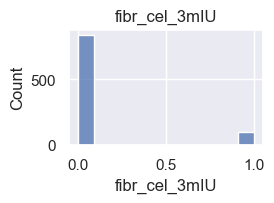

<Figure size 500x300 with 0 Axes>

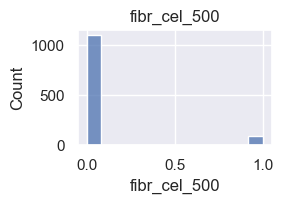

<Figure size 500x300 with 0 Axes>

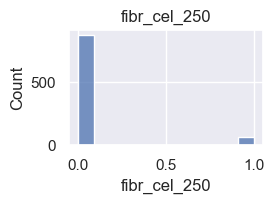

<Figure size 500x300 with 0 Axes>

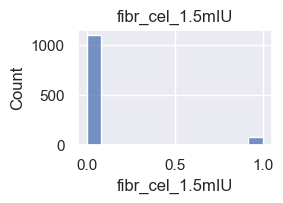

<Figure size 500x300 with 0 Axes>

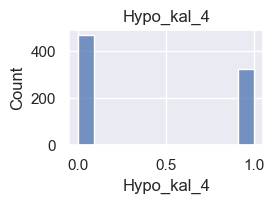

<Figure size 500x300 with 0 Axes>

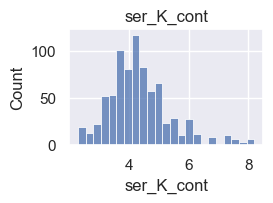

<Figure size 500x300 with 0 Axes>

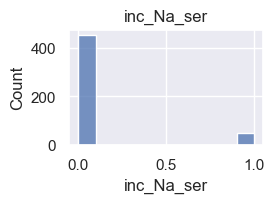

<Figure size 500x300 with 0 Axes>

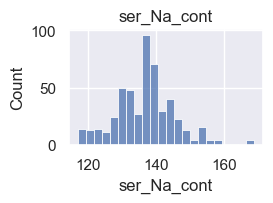

<Figure size 500x300 with 0 Axes>

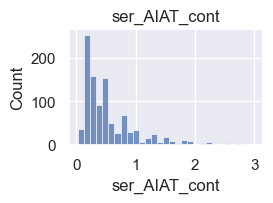

<Figure size 500x300 with 0 Axes>

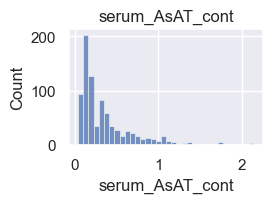

<Figure size 500x300 with 0 Axes>

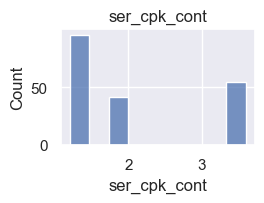

<Figure size 500x300 with 0 Axes>

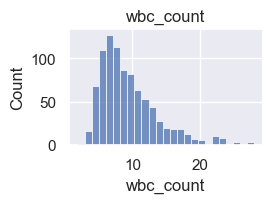

<Figure size 500x300 with 0 Axes>

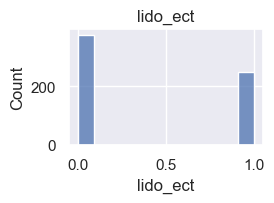

<Figure size 500x300 with 0 Axes>

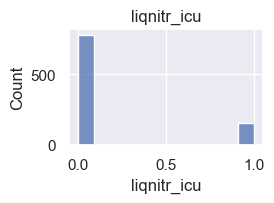

<Figure size 500x300 with 0 Axes>

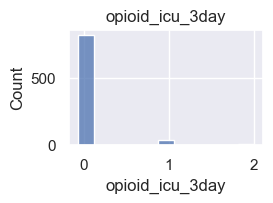

<Figure size 500x300 with 0 Axes>

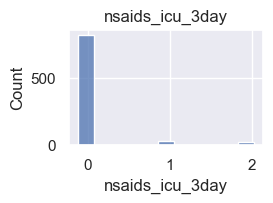

<Figure size 500x300 with 0 Axes>

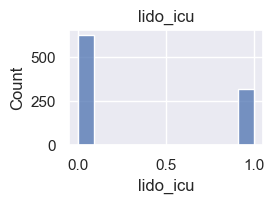

<Figure size 500x300 with 0 Axes>

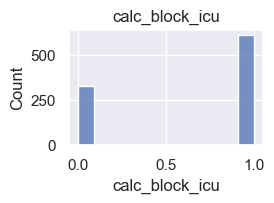

<Figure size 500x300 with 0 Axes>

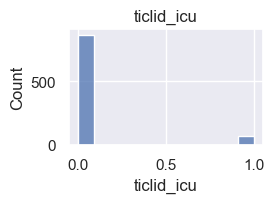

<Figure size 500x300 with 0 Axes>

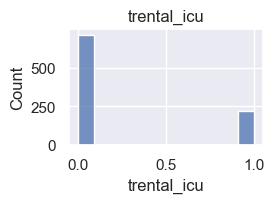

<Figure size 500x300 with 0 Axes>

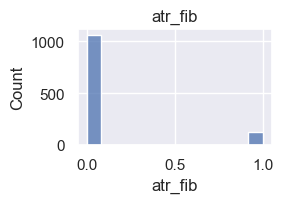

<Figure size 500x300 with 0 Axes>

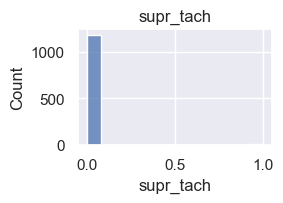

<Figure size 500x300 with 0 Axes>

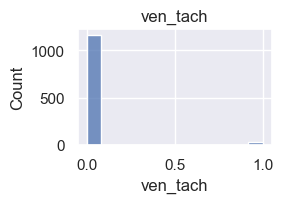

<Figure size 500x300 with 0 Axes>

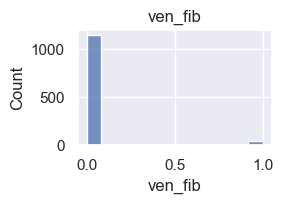

<Figure size 500x300 with 0 Axes>

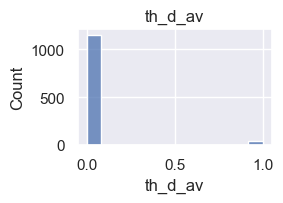

<Figure size 500x300 with 0 Axes>

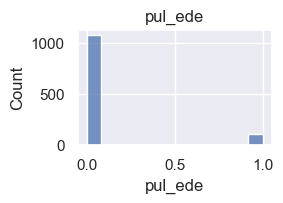

<Figure size 500x300 with 0 Axes>

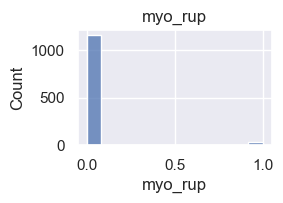

<Figure size 500x300 with 0 Axes>

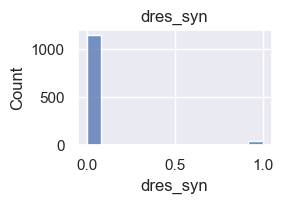

<Figure size 500x300 with 0 Axes>

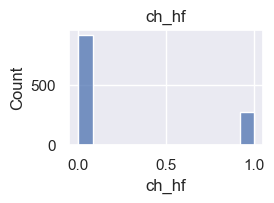

<Figure size 500x300 with 0 Axes>

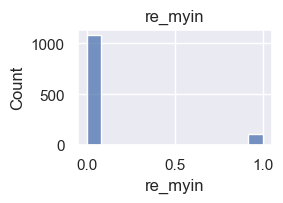

<Figure size 500x300 with 0 Axes>

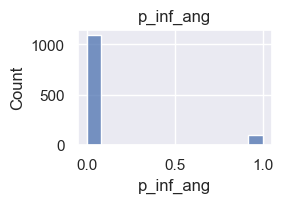

<Figure size 500x300 with 0 Axes>

In [28]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    sns.histplot(df[col])
    plt.title(col)
    plt.figure(figsize=(5,3))
    plt.show()

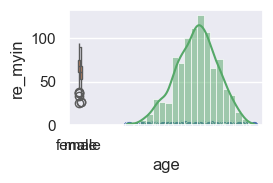

In [29]:
#Bivariate analysis
sns.scatterplot(x='age', y='re_myin', data=df)  
sns.boxplot(x='sex', y='age', data=df)
sns.histplot(df['age'], bins=20, kde=True) 
plt.show()

In [12]:
#Loading the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Storing the IDs for the final submission
submission_ids = test_data['ID']

#Drop irrelevant columns (ID)
train_data.drop(columns=['ID'], inplace=True)
test_data.drop(columns=['ID'], inplace=True)

#Defining features and target variables
X_train = train_data.drop(columns=['atr_fib', 'supr_tach', 'ven_tach', 'ven_fib', 'th_d_av', 'pul_ede', 'myo_rup', 'dres_syn', 'ch_hf', 're_myin', 'p_inf_ang'])
y_train = train_data[['atr_fib', 'supr_tach', 'ven_tach', 'ven_fib', 'th_d_av', 'pul_ede', 'myo_rup', 'dres_syn', 'ch_hf', 're_myin', 'p_inf_ang']]

#Preprocessing pipeline for numerical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

#Preprocessing pipeline for categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist'))])

#Combining preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


models = {}
for column in y_train.columns:
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=150,criterion='entropy'
                                                                  ,max_features='sqrt',warm_start=True,
                                                                  class_weight='balanced_subsample',
                                                                  bootstrap=False,n_jobs=-1,random_state=100
                                                                  ))])
    model.fit(X_train, y_train[column])
    models[column] = model


X_test = test_data
predictions = {}
for column, model in models.items():
    predictions[column] = model.predict_proba(X_test)[:, 1]

submission_df = pd.DataFrame({'ID': submission_ids})   #Use original IDs for submission
for column in y_train.columns:
    submission_df[column] = predictions[column]

#Save the submission to a csv file
submission_df.to_csv('submission.csv', index=False)

c:\Users\hrith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
c:\Users\hrith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the

In [13]:
X_train.head()

,age,sex,myocardial_infarctions_anamnesis,Exertional_angina_pectoris_anamnesis,FC_of_angina_pectoris,Coronary_heart_disease(CHD),Heredity_on_CHD,essential_hypertension,Symptomatic_hypertension,no_arterial_hypertension_duration,...,nsaids_icu_1hour,nsaids_icu_2day,nsaids_icu_3day,lido_icu,beta_block_icu,calc_block_icu,heparin_icu,acetylsal_icu,ticlid_icu,trental_icu
0,69.000000,female,two,3y ago,II FC,unstable,NaN,Stage 2,0,NaN,...,0,1,0.0,0.0,0,1.0,0,1,0.0,0.0
1,58.000000,male,zero,never,0,0,NaN,0,0,0,...,0,0,0.0,0.0,0,0.0,1,NaN,0.0,0.0
2,72.000000,female,zero,>5y ago,II FC,exertional,NaN,Stage 3,?,>10y,...,thrice,?,0.0,0.0,0,1.0,1,1,0.0,0.0
3,73.000000,female,zero,?,IV FC,unstable,NaN,NaN,1,4y,...,0,0,0.0,1.0,0,1.0,0,1,1.0,0.0
4,75.655137,female,zero,3y ago,0,exertional,NaN,Stage 3,0,NaN,...,thrice,NaN,NaN,1.0,0,0.0,1,0,0.0,0.0
